In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import os, sys

sys.path.append(os.path.abspath(".."))

from src.utils import get_athena_connection, read_sql_df
from src.config import DB_ATHENA


# Athena connection
conn = get_athena_connection()
print(f"Connected to Athena database:'{DB_ATHENA}'")

def run_sql(sql: str) -> pd.DataFrame:
    """
    Execute a SQL query on Athena (MovieLens 32M) and return a Pandas DataFrame.
    """
    return read_sql_df(sql, conn=conn)

Connected to Athena database:'movielens32m'


##### Tables from the original dataset
 - Movies:
    - movieID
    - title
    - genres
 - ratings:
    - userId
    - movieId
    - rating
    - timestamp
 - links:
    - moviesId
    - imdbId
    - tmdbId
 - tags:
    - userId
    - movieId
    - tag
    - timestamp




In [3]:
# Find the 20 movies with the highest average rating (with at least 50 ratings)
df1 = run_sql("""
SELECT
    m.title,
    ROUND(AVG(r.rating), 2) AS media_rating,
    COUNT(*)                AS total_ratings
FROM ratings_parquet AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
GROUP BY m.title
HAVING COUNT(*) >= 50
ORDER BY media_rating DESC, total_ratings DESC
LIMIT 20
""")

df1


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,title,media_rating,total_ratings
0,Planet Earth II (2016),4.45,1956
1,Planet Earth (2006),4.44,2948
2,Band of Brothers (2001),4.43,2811
3,"Shawshank Redemption, The (1994)",4.40,102929
4,Cosmos,4.33,615
5,"Godfather, The (1972)",4.32,66440
6,Parasite (2019),4.31,11670
7,Blue Planet II (2017),4.30,1163
8,Twin Peaks (1989),4.30,1140
9,Twelve Angry Men (1954),4.29,449


In [4]:
df1.columns

Index(['title', 'media_rating', 'total_ratings'], dtype='object')

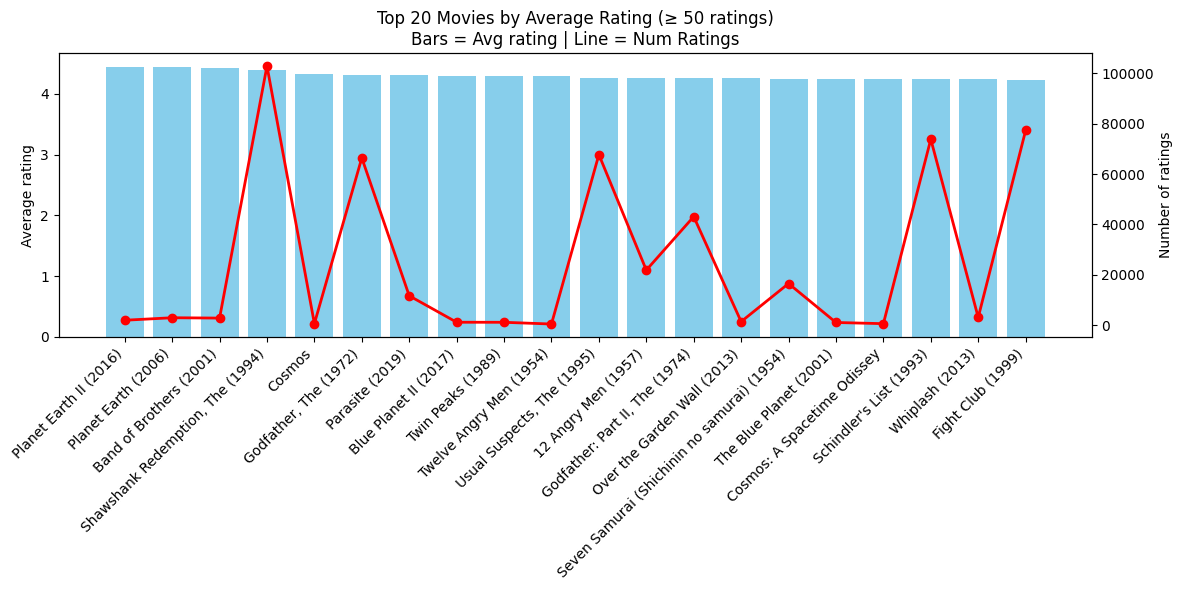

In [5]:
import matplotlib.pyplot as plt

# Combined plot: bars = average rating, line = number of ratings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bars showing the average rating (blue)
ax1.bar(df1["title"], df1["media_rating"], color="skyblue")
ax1.set_ylabel("Average rating")
ax1.set_xticks(range(len(df1)))
ax1.set_xticklabels(df1["title"], rotation=45, ha="right")

# Line showing the number of ratings (red)
ax2 = ax1.twinx()
ax2.plot(range(len(df1)), df1["total_ratings"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Number of ratings")

plt.title("Top 20 Movies by Average Rating (≥ 50 ratings)\nBars = Avg rating | Line = Num Ratings")
plt.tight_layout()
plt.show()


In [6]:
# Ranking of the 20 movies with the highest number of ratings
df2 = run_sql("""
SELECT
    m.title,
    COUNT(*) AS total_ratings,
    ROUND(AVG(r.rating), 2) AS media_rating
FROM ratings_parquet AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
GROUP BY m.title
ORDER BY total_ratings DESC, media_rating DESC
LIMIT 20
""")

df2

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,title,total_ratings,media_rating
0,"Shawshank Redemption, The (1994)",102929,4.40
1,Forrest Gump (1994),100296,4.05
2,Pulp Fiction (1994),98409,4.20
3,"Matrix, The (1999)",93808,4.16
4,"Silence of the Lambs, The (1991)",90330,4.15
5,Star Wars: Episode IV - A New Hope (1977),85010,4.10
6,Fight Club (1999),77332,4.23
7,Jurassic Park (1993),75233,3.70
8,Schindler's List (1993),73849,4.24
9,"Lord of the Rings: The Fellowship of the Ring,...",73122,4.09


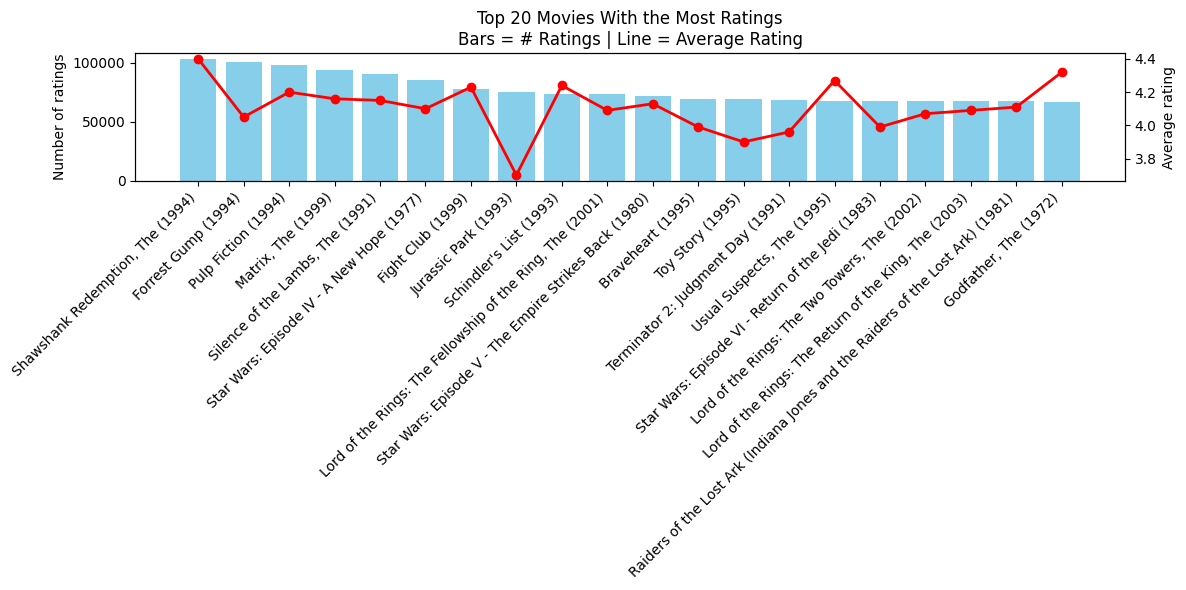

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bars = number of ratings (blue)
ax1.bar(df2["title"], df2["total_ratings"], color="skyblue")
ax1.set_ylabel("Number of ratings")
ax1.set_xticks(range(len(df2)))
ax1.set_xticklabels(df2["title"], rotation=45, ha="right")

# Line = average rating (red)
ax2 = ax1.twinx()
ax2.plot(range(len(df2)), df2["media_rating"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Average rating")

plt.title("Top 20 Movies With the Most Ratings\nBars = # Ratings | Line = Average Rating")
plt.tight_layout()
plt.show()


In [8]:
# =================================================================
# Ranking of movies by genre (with at least 50 ratings)
# =================================================================
df3 = run_sql("""
WITH movie_genre AS (
    SELECT
        m.movieid,
        m.title,
        genre
    FROM movies_parquet AS m
    CROSS JOIN UNNEST(split(m.genres, '|')) AS t(genre)
),
movie_genre_stats AS (
    SELECT
        mg.genre,
        mg.movieid,
        mg.title,
        COUNT(*) AS total_ratings,
        AVG(r.rating) AS media_rating
    FROM movie_genre AS mg
    JOIN ratings_parquet AS r
        ON r.movieid = mg.movieid
    GROUP BY mg.genre, mg.movieid, mg.title
    HAVING COUNT(*) >= 50    -- minimum of 50 ratings
),
genre_ranking AS (
    SELECT
        genre,
        movieid,
        title,
        total_ratings,
        media_rating,
        ROW_NUMBER() OVER (
            PARTITION BY genre
            ORDER BY media_rating DESC, total_ratings DESC
        ) AS position
    FROM movie_genre_stats
)
SELECT
    genre,
    title,
    ROUND(media_rating, 2) AS media_rating,
    total_ratings
FROM genre_ranking
WHERE position = 1
ORDER BY genre
""")

df3

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,genre,title,media_rating,total_ratings
0,(no genres listed),Cosmos,4.33,615
1,Action,Band of Brothers (2001),4.43,2811
2,Adventure,Over the Garden Wall (2013),4.26,1397
3,Animation,Over the Garden Wall (2013),4.26,1397
4,Children,My Neighbor Totoro (Tonari no Totoro) (1988),4.16,13556
5,Comedy,Parasite (2019),4.31,11670
6,Crime,"Shawshank Redemption, The (1994)",4.40,102929
7,Documentary,Planet Earth II (2016),4.45,1956
8,Drama,Band of Brothers (2001),4.43,2811
9,Fantasy,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.21,33333


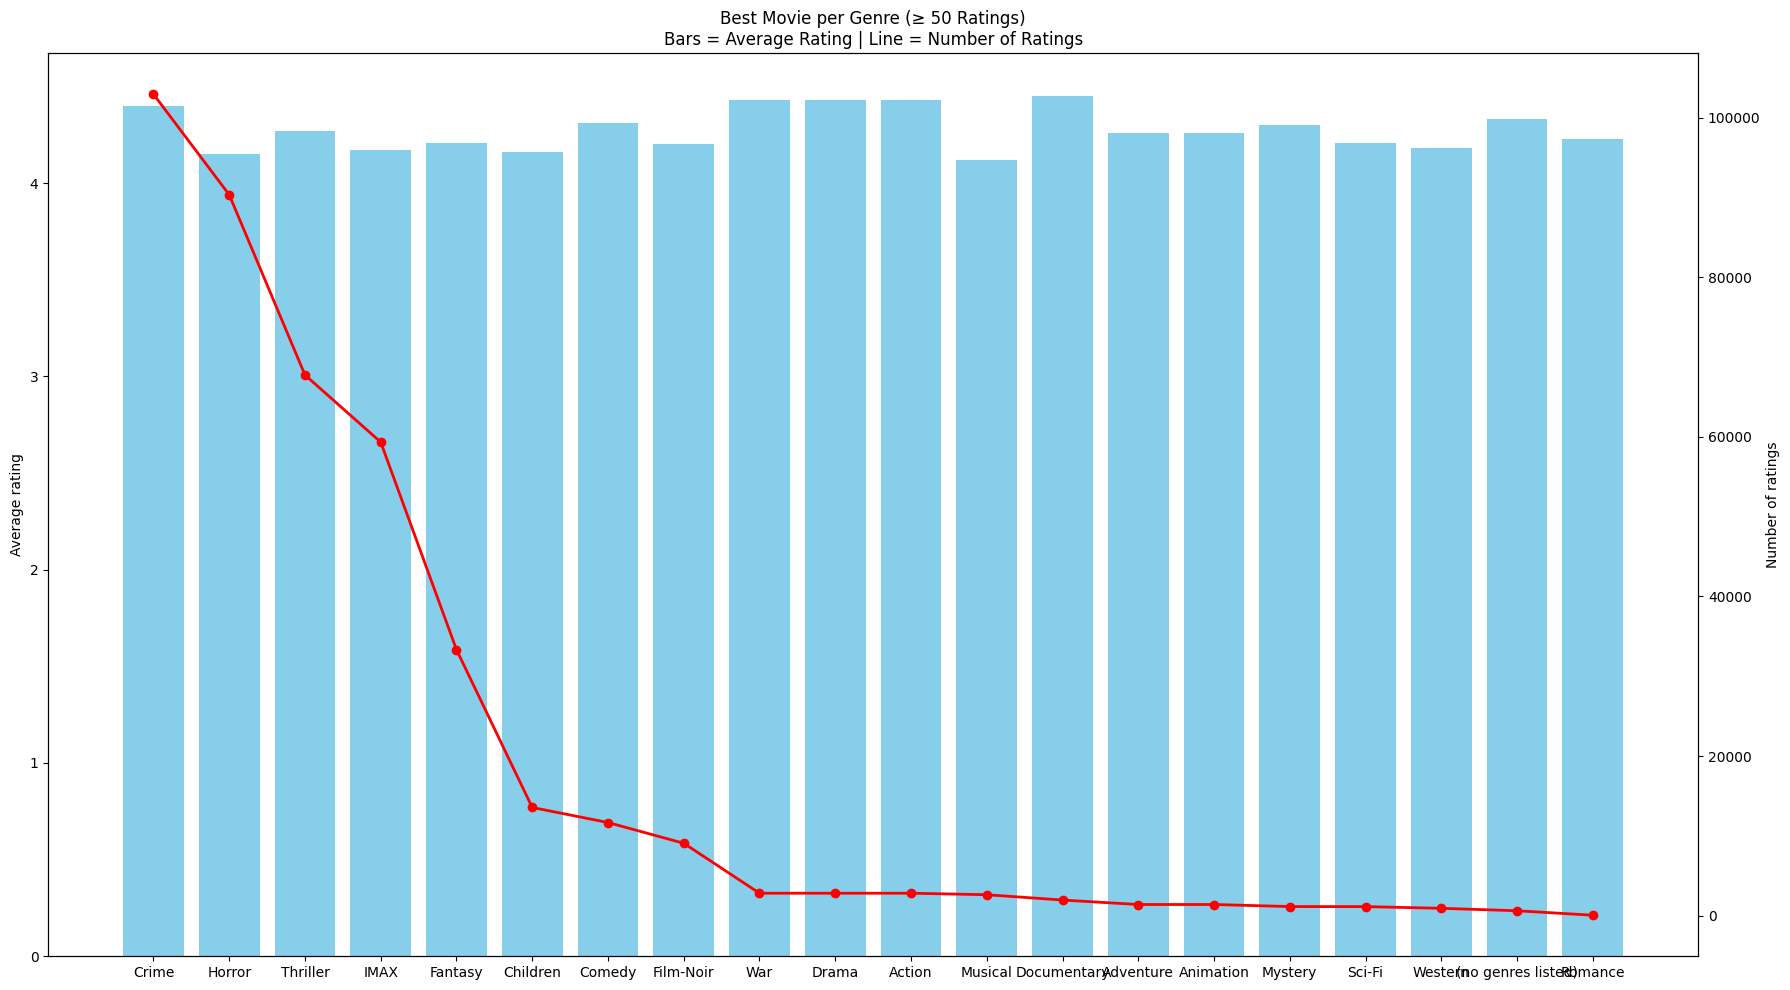

In [10]:
# Sort by number of ratings (descending)
df3_plot = df3.sort_values("total_ratings", ascending=False)

x = np.arange(len(df3_plot))   # 0..N-1

fig, ax1 = plt.subplots(figsize=(18, 10))

# Bars = average rating
ax1.bar(x, df3_plot["media_rating"], color="skyblue")
ax1.set_ylabel("Average rating")

# Line = number of ratings
ax2 = ax1.twinx()
ax2.plot(x, df3_plot["total_ratings"], marker="o", color="red", linewidth=2)
ax2.set_ylabel("Number of ratings")

# Genres as x-axis labels
plt.xticks(x, df3_plot["genre"], rotation=90)

plt.title("Best Movie per Genre (≥ 50 Ratings)\nBars = Average Rating | Line = Number of Ratings")
plt.tight_layout()
plt.show()


In [11]:
# =================================================================
# Ranking of the most-rated movies per genre (with at least 50 ratings)
# =================================================================

df4 = run_sql("""
WITH movie_genre AS (
    SELECT
        m.movieid,
        m.title,
        genre
    FROM movies_parquet AS m
    CROSS JOIN UNNEST(split(m.genres, '|')) AS t(genre)
),
movie_genre_stats AS (
    SELECT
        mg.genre,
        mg.movieid,
        mg.title,
        COUNT(*) AS total_ratings,
        AVG(r.rating) AS media_rating
    FROM movie_genre AS mg
    JOIN ratings_parquet AS r
        ON r.movieid = mg.movieid
    GROUP BY mg.genre, mg.movieid, mg.title
    HAVING COUNT(*) >= 50  -- keep only movies with at least 50 ratings
),
genre_ranking AS (
    SELECT
        genre,
        movieid,
        title,
        total_ratings,
        media_rating,
        ROW_NUMBER() OVER (
            PARTITION BY genre
            ORDER BY total_ratings DESC, media_rating DESC
        ) AS position
    FROM movie_genre_stats
)
SELECT
    genre,
    title,
    total_ratings,
    ROUND(media_rating, 2) AS media_rating
FROM genre_ranking
WHERE position = 1
ORDER BY genre, position
""")

df4

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,genre,title,total_ratings,media_rating
0,(no genres listed),Hereditary (2018),4596,3.86
1,Action,"Matrix, The (1999)",93808,4.16
2,Adventure,Star Wars: Episode IV - A New Hope (1977),85010,4.10
3,Animation,Toy Story (1995),68997,3.90
4,Children,Toy Story (1995),68997,3.90
5,Comedy,Forrest Gump (1994),100296,4.05
6,Crime,"Shawshank Redemption, The (1994)",102929,4.40
7,Documentary,Bowling for Columbine (2002),16169,3.69
8,Drama,"Shawshank Redemption, The (1994)",102929,4.40
9,Fantasy,"Lord of the Rings: The Fellowship of the Ring,...",73122,4.09


In [13]:
# ================================================
# Most frequent tag words
# ================================================

df5 = run_sql("""
SELECT
    word,
    COUNT(*) AS total
FROM (
    SELECT
        LOWER(TRIM(w)) AS word
    FROM tags_parquet
    CROSS JOIN UNNEST(split(tag, ' ')) AS t(w)
) sub
WHERE word <> ''
  AND LENGTH(word) > 2
  AND word NOT IN ('the', 'and', 'for', 'with', 'this', 'that', 'are')
GROUP BY word
ORDER BY total DESC
LIMIT 30
""")

df5


,word,total
0,comedy,26298
1,based,19471
2,relationship,16448
3,film,16108
4,ending,15949
5,nudity,15130
6,dark,14702
7,female,14165
8,great,13617
9,book,12891


In [15]:
# ================================================
# Most frequent tag words per movie
# ================================================

df6 = run_sql("""
WITH words_per_movie AS (
    SELECT
        t.movieid,
        t.word,
        COUNT(*) AS total
    FROM (
        SELECT
            movieid,
            LOWER(TRIM(w)) AS word
        FROM tags_parquet
        CROSS JOIN UNNEST(split(tag, ' ')) AS u(w)
    ) AS t
    WHERE t.word <> ''
      AND LENGTH(t.word) > 2
      AND t.word NOT IN ('the', 'and', 'for', 'with', 'this', 'that', 'are', 'was')
    GROUP BY t.movieid, t.word
),
ranking_per_movie AS (
    SELECT
        movieid,
        word,
        total,
        ROW_NUMBER() OVER (
            PARTITION BY movieid
            ORDER BY total DESC
        ) AS position
    FROM words_per_movie
)
SELECT
    m.movieid,
    m.title,
    r.word,
    r.total
FROM ranking_per_movie AS r
JOIN movies_parquet AS m
    ON r.movieid = m.movieid
WHERE r.position <= 5
ORDER BY r.total DESC
LIMIT 20
""")

df6


,movieid,title,word,total
0,260,Star Wars: Episode IV - A New Hope (1977),space,1021
1,260,Star Wars: Episode IV - A New Hope (1977),sci-fi,833
2,260,Star Wars: Episode IV - A New Hope (1977),classic,618
3,109487,Interstellar (2014),space,572
4,296,Pulp Fiction (1994),comedy,529
5,296,Pulp Fiction (1994),tarantino,516
6,260,Star Wars: Episode IV - A New Hope (1977),adventure,500
7,2571,"Matrix, The (1999)",reality,490
8,318,"Shawshank Redemption, The (1994)",ending,477
9,164179,Arrival (2016),sci-fi,469


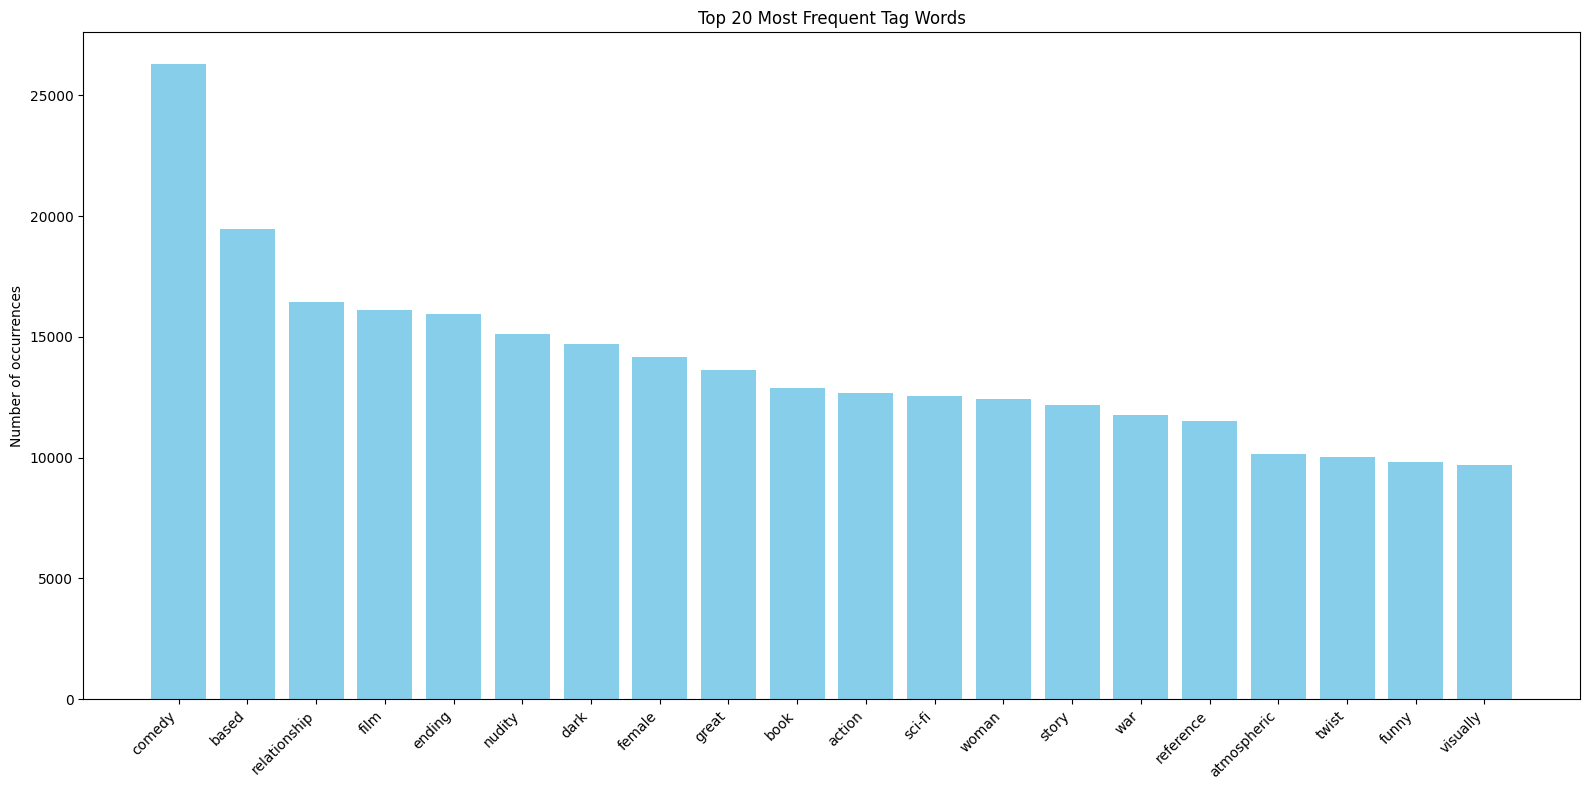

In [16]:
# Top 20 tag words
df_top = df5.sort_values("total", ascending=False).head(20)

plt.figure(figsize=(16, 8))
plt.bar(df_top["word"], df_top["total"], color="skyblue")

plt.title("Top 20 Most Frequent Tag Words")
plt.ylabel("Number of occurrences")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [17]:
# ================================================
# Users with the highest number of ratings and average score
# ================================================

df7 = run_sql("""
SELECT
    r.userid,
    COUNT(*) AS total_ratings,
    ROUND(AVG(r.rating), 2) AS media_rating
FROM ratings_parquet AS r
GROUP BY r.userid
ORDER BY total_ratings DESC, media_rating DESC
LIMIT 20
""")

df7

c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,userid,total_ratings,media_rating
0,175325,33332,3.08
1,17035,9577,2.57
2,55653,9178,3.28
3,123465,9044,2.53
4,171795,9016,3.18
5,10202,7748,3.41
6,198515,7594,2.82
7,49305,7488,3.21
8,22744,7372,2.64
9,7858,7322,1.55


In [18]:
df_users = run_sql("""
SELECT
    userid,
    COUNT(*) AS total_ratings,
    ROUND(AVG(rating), 2) AS media_rating
FROM ratings_parquet
GROUP BY userid
""")


c:\Users\sarac\rep_DSF\BigDataFoundations\src\utils.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


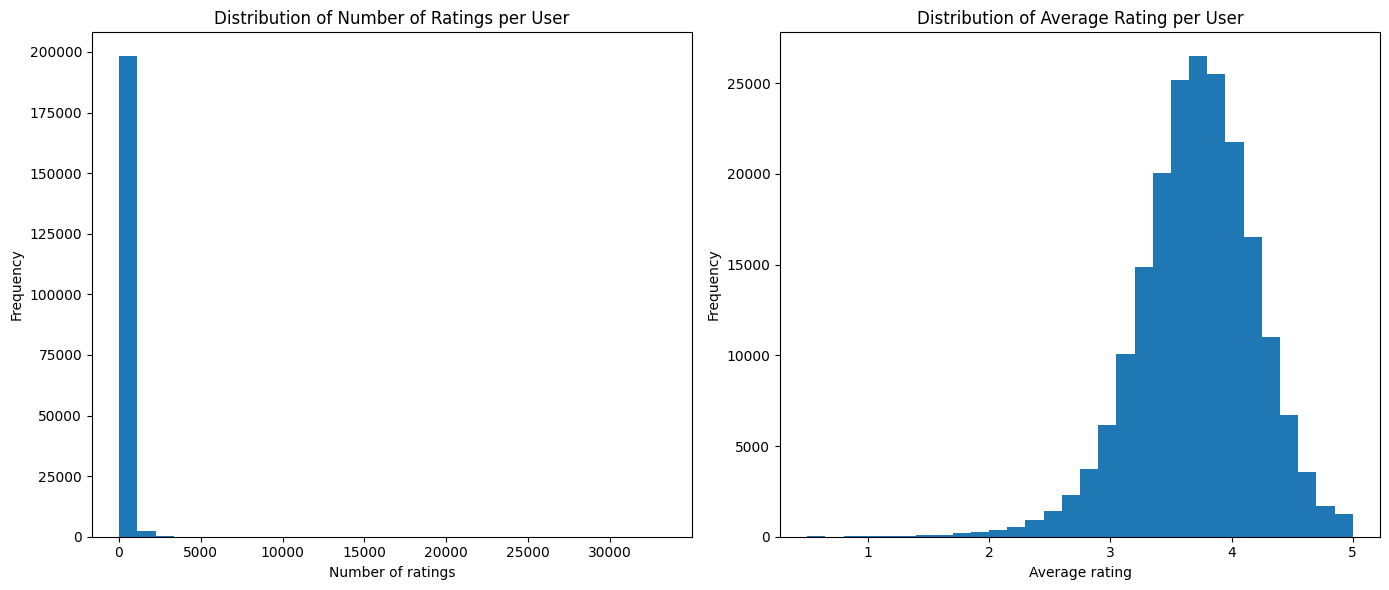

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram: number of ratings per user
axes[0].hist(df_users["total_ratings"], bins=30)
axes[0].set_title("Distribution of Number of Ratings per User")
axes[0].set_xlabel("Number of ratings")
axes[0].set_ylabel("Frequency")

# Histogram: average rating per user
axes[1].hist(df_users["media_rating"], bins=30)
axes[1].set_title("Distribution of Average Rating per User")
axes[1].set_xlabel("Average rating")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Close connection

In [20]:
conn.close()
print("Athena's connection closed.")

Athena's connection closed.
